## Develop a predictive model for accurate home price estimation using property features. Provide data-driven insights to empower homeowners and real estate agents in setting competitive prices and making informed decisions about renovations for maximizing property value.

In [2]:
#importing the neccesary libraries for our analysis
import pandas as pd #
import numpy as np#
import matplotlib.pyplot as plt #
import seaborn as sns#
%matplotlib inline

In [3]:
#Reading the data into a dataframe and previewing the first 5 rows just to see how our data looks like
df=pd.read_csv('kc_house_data.csv')#I've used pandas to read the csv file that we have on our data itself 
pd.set_option('display.max_columns', None)# this inbuilt function ensures that all our columns are displayed rather than just half version 
#of it
df.head(20)# this preview of dataset with the first five rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,Average,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,Average,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,Average,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
df.shape # I'm looking at the shape of the data so we know exactly how many rows and columns we are dealing with

(21597, 21)

In [5]:
df.info()#this is a simple way to get a quick overview of your DataFrame, including its size, column names, data types, and the number 
#of non-null values. It's useful for understanding the structure of your data and checking for missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

I'm analyzing a dataset that contains information about property listings, with 21 columns and 21,597 entries. Each row represents a unique property listing, while columns provide details like price, bedrooms, bathrooms, and more. I've noticed missing values in certain columns, which may require data imputation. The data types vary, with integers, floating-point numbers, and object types, suggesting a mix of numerical and categorical data. This initial overview allows me to grasp the dataset's size, structure, and potential data quality issues, setting the stage for further exploration and analysis.

In [6]:
#This code computes and displays information about missing data in your DataFrame, including the overall number of missing values and 
# their percentage for each column, sorted by the percentage of missing values. It helps to determine which columns have the 
# most missing data, which is important for preprocessing and cleaning up the data.
total=df.isnull().sum().sort_values(ascending=False)#This determines how many missing values (NaN) there are overall in each column 
#of the DataFrame df. The count of missing values in each column is returned as a Series with the column names as indices and values.
percent=((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)#This arranges the Series in descending order, with 
#the columns having the most missing values at the top, after calculating the missing values in each column.
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])#The two Series formed in steps 1 and 3 are combined into a 
# new DataFrame called missing_data by this line. The column headings "Total" and "Percent" denote the overall count and percentage of 
# missing values in each column, respectively, and they are arranged side by side.
missing_data

,Total,Percent
yr_renovated,3842,17.789508
waterfront,2376,11.001528
view,63,0.291707
id,0,0.000000
sqft_above,0,0.000000
sqft_living15,0,0.000000
long,0,0.000000
lat,0,0.000000
zipcode,0,0.000000
yr_built,0,0.000000


From the above missing value analysis suggests that,a sizable portion of the values in the columns "waterfront" and "yr_renovated" are missing, particularly "yr_renovated," which has the greatest percentage of missing data at about 18%. This implies that particular care may need to be taken while preparing data for these columns.
Around 0.29 percent of the values in the column "view" are missing, which may make handling it easier.

In [7]:
df.duplicated().any()# We are checking if there are any duplicate data in our dataset so that we can remove them

False

## HANDLING MISSING VALUES

In [8]:
#First let us look at the outlook of yr_renovated column before anything lets look at its value counts as well to see the renovation
df['yr_renovated'].value_counts().head(7)

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
2000.0       29
2005.0       29
Name: yr_renovated, dtype: int64

From the above we can see that majority of the houses have renovation year as 0.0 which suggests that they haven't been renovated. This is consistent with the widespread practice of assigning a sentinel value of 0 or something comparable to missing or unrenovated properties.There are relatively few properties with specific renovation years, such as 2014, 2013, 2003, 2007. These represent properties that have undergone renovations, and the years are recorded.
Based on this distribution, it appears plausible to propose using 0 as the imputed value for missing "yr_renovated" records, as this accords with the widely held belief that missing values indicate no renovation. 

In [9]:
df['yr_renovated'].fillna(0, inplace=True) # here im imputing the missing value with 0 

Based on the distribution of "yr_renovated" values and the standard practice of using 0 as a sentinel value to signify no renovation, it appears sensible to use 0 as the imputed value for missing "yr_renovated" items in your dataset. This method is consistent with the premise that missing numbers in this column imply a lack of renovation.

In [10]:
#Let's look at waterfront now
df['waterfront'].value_counts()# using this we can see the distribution of the  waterfront meaning different houses that have and 
#have  no waterfront 

NO     19075
YES      146
Name: waterfront, dtype: int64

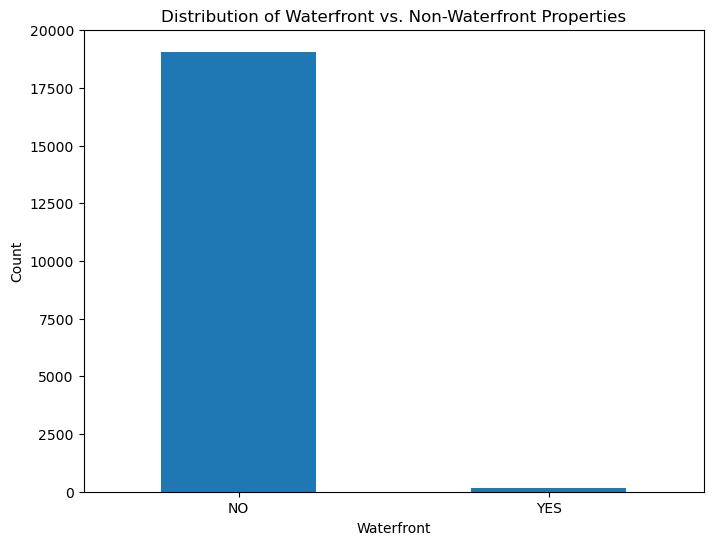

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df['waterfront'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Waterfront')
plt.ylabel('Count')
plt.title('Distribution of Waterfront vs. Non-Waterfront Properties')
plt.show()


Because most properties do not have a waterfront based on the distribution of the waterfront, mode imputation (filling missing values with the mode, which is the most frequent value) is an acceptable technique. This entails replacing missing "waterfront" values with the most common category, which is most likely "no" if the property does not have a waterfront view.

In [12]:
# Imputing the  missing 'waterfront' values with the mode ('no')
df['waterfront'].fillna(df['waterfront'].mode()[0], inplace=True)

In [13]:
#FINALLY LET'S LOOK AT VIEW
df['view'].isnull().sum()

63

Given that there are only 63 missing values in the "view" column out of about 21,000 records, it is appropriate to consider removing those rows with missing "view" values. This method is frequently appropriate when the amount of missing data is relatively tiny and has no substantial impact on the total dataset.

In [14]:
df.dropna(subset=['view'], inplace=True) # Here I'm dropping the rows in the view columns that have missing values

In [15]:
#Okay now let's check if there are any missing values in our dataset after we have done our cleaning
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
df['sqft_basement'].value_counts().head()

0.0      12798
?          452
600.0      216
500.0      209
700.0      207
Name: sqft_basement, dtype: int64

When I looked at the "sqft_basement" column, I noticed the '?' symbol. This symbol is commonly used as a placeholder in data to signify missing or unknown values. I replaced all instances of '?' with a standard notation for missing values, 'NaN' (Not a Number), to ensure uniformity and proper handling of missing data. This modification makes data analysis and modeling more effective because missing values are now appropriately labeled as 'NaN.'

In [17]:
df['sqft_basement'] = df['sqft_basement'].replace('?', np.nan)#this code replaces the ? with nan so that the missing values can be 
#properly identified and then we deal with them.

In [18]:
df['sqft_basement'].isnull().sum()# so now we want to see generally how many null values are in our sqft basement column

452

The '?' symbol represents missing values in the "sqft_basement" column. The meaning of '0.0' in this context is unclear; it might either signify properties without basements or an actual basement size of zero square feet. A conservative and data-driven method, median imputation avoids making assumptions about the presence or absence of basements. But for us to use median first we need to convert the column to numeric so that it becomes easier for computations

In [19]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce') #Converting the columns first to numeric before computing 
#the median
median_sqft_basement = df['sqft_basement'].median() #obtaining the median of the column
df['sqft_basement'].fillna(median_sqft_basement, inplace=True)# Finally we fill the missing values with the median imputation method

Our dataset is now ready for analysis after applying median imputation to the "sqft_basement" column and filling in missing values in other relevant columns. We have effectively eliminated all missing values, guaranteeing that the data is complete and appropriate for our rigorous data exploration, feature engineering, modeling, and evaluation stages. This data integrity is critical for delivering accurate and dependable insights in order to effectively accomplish our project objectives.

## CHECKING AND HANDLING OUTLIERS

In [20]:
def handle_outliers(df):
    df = df.select_dtypes(include=['int64', 'float64'])  # Selecting numerical columns
    for col in df.columns:
        data_mean, data_std = df[col].mean(), df[col].std()  
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off

        # Identify and handle outliers
        outliers = (df[col] < lower) | (df[col] > upper)
        df.loc[outliers, col] = df[col].median()  

    return df

In [21]:
handle_outliers(df)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,0.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,400000.0,3,2.50,1600,2388,2.0,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


### EDA

### Univariate Analysis

### What is the overall distribution of home prices in the dataset?

Text(0.5, 1.0, 'Distribution of Home Prices')

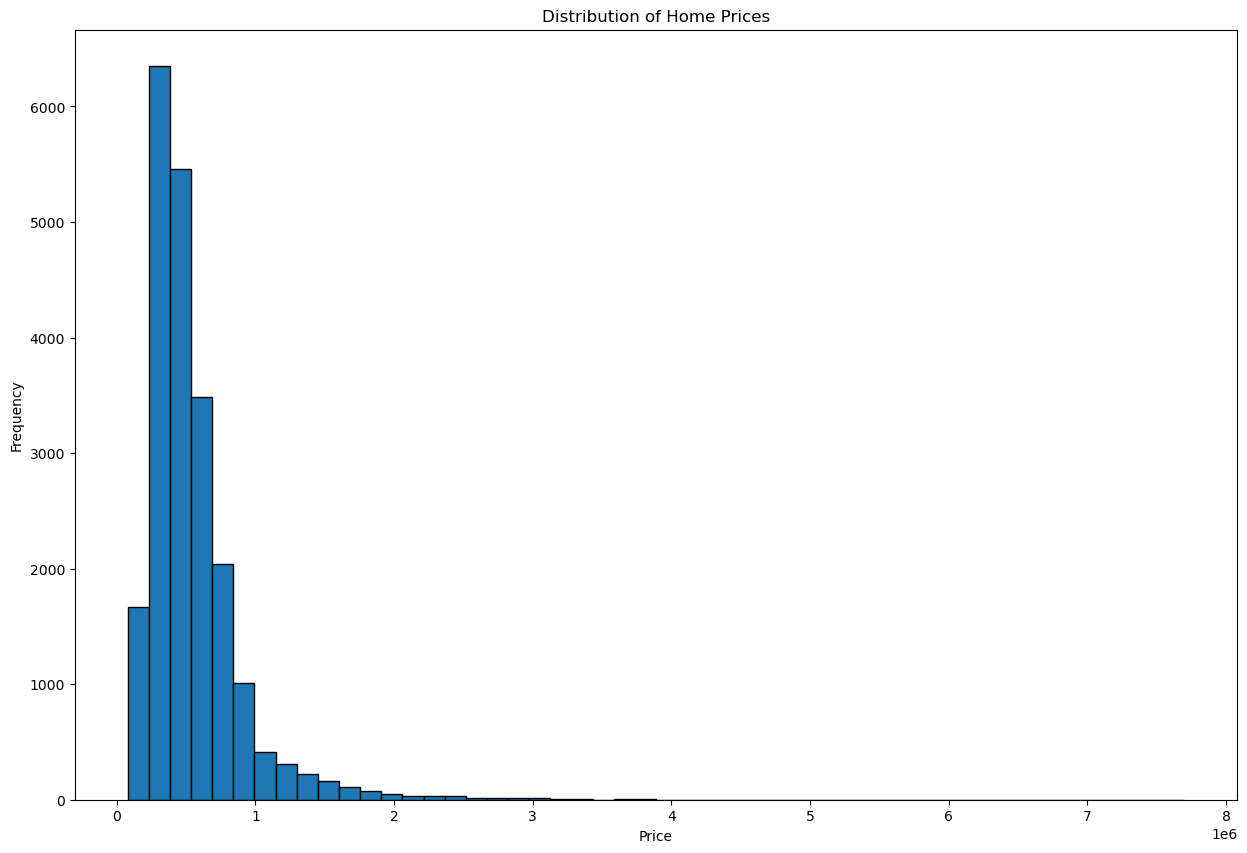

In [22]:
plt.figure(figsize=(15, 10))
plt.hist(df['price'], bins=50, edgecolor='k')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Home Prices')

The distribution of property prices in the sample is bimodal, with two major price ranges around $350,000  and  $450,000. While most properties fit into one of these two categories, there is some price variation, with a few higher-priced outliers on the right side of the distribution. This information might be useful for analyzing the pricing trends in your dataset and making smart real estate decisions.


### Are there any extreme outliers in the dataset, and what might explain their presence?

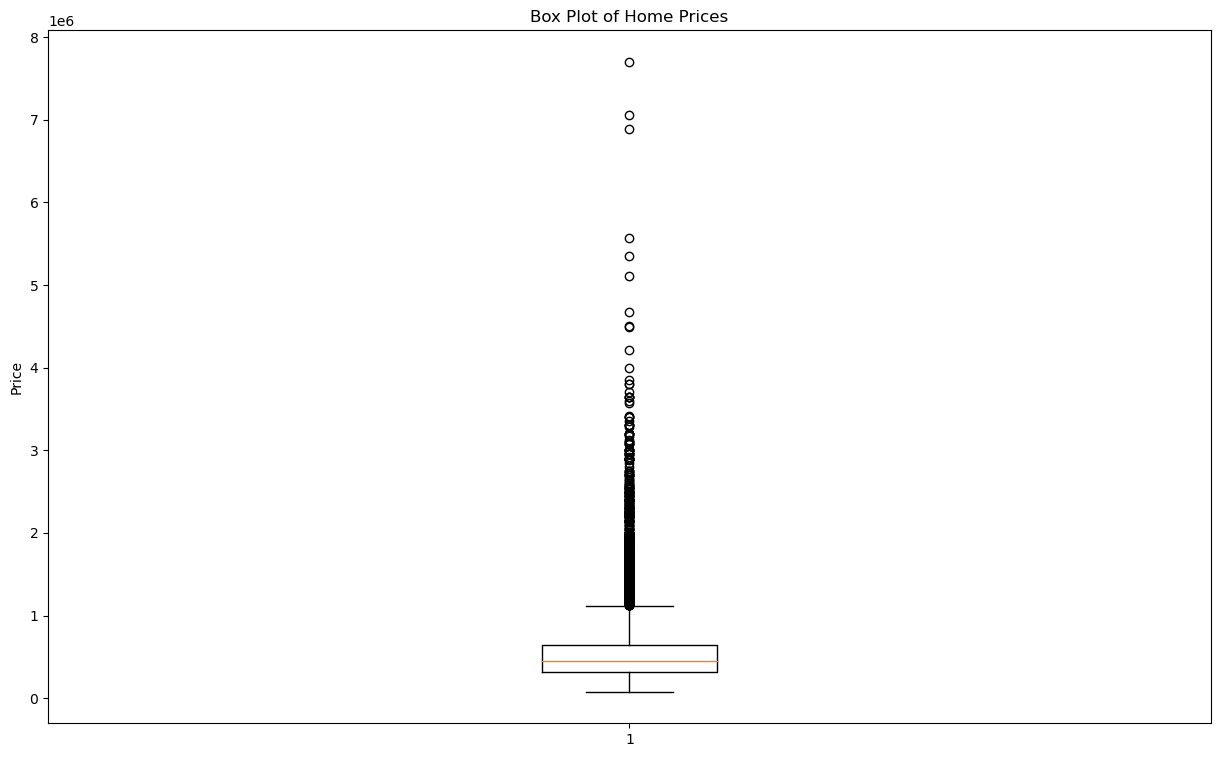

In [23]:
plt.figure(figsize=(15,9))
plt.boxplot(df['price'])
plt.ylabel('Price')
plt.title('Box Plot of Home Prices')
plt.show()

In [24]:
q1 = np.percentile(df['price'], 25)
q3 = np.percentile(df['price'], 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = [price for price in df['price'] if price < lower_bound or price > upper_bound]
len(outliers)

1153

There are 1153 outliers out of 21534 this suggests that exceptionally high-end properties with unique features or prestigious locations may have much higher prices, and why some extreme values in the dataset may represent luxury homes or properties with exceptional characteristics.So I prefer to just leave them in the dataset itself

## Bivariate Analysis

#### Does the condition of the home affect home price?

In [25]:
contingency_table = pd.crosstab(df["condition"], df["price"])
contingency_table

price      78000.0    80000.0    81000.0    82000.0    82500.0    83000.0    \
condition                                                                     
Average            0          0          0          1          0          1   
Fair               0          1          0          0          1          0   
Good               0          0          0          0          0          0   
Poor               1          0          1          0          0          0   
Very Good          0          0          0          0          0          0   

price      84000.0    85000.0    86500.0    89000.0    89950.0    90000.0    \
condition                                                                     
Average            1          2          1          0          1          4   
Fair               0          0          0          0          0          0   
Good               0          0          0          1          0          1   
Poor               0          0          0          0          0          0   
Very Good          0          0          0          0          0          0   

price      92000.0    95000.0    96500.0    99000.0    100000.0   102500.0   \
condition                                                                     
Average            1          2          1          0          4          1   
Fair               0          1          0          1          1          0   
Good               0          1          0          0          1          0   
Poor               0          0          0          0          0          0   
Very Good          0          0          0          0          0          0   

price      104950.0   105000.0   105500.0   106000.0   107000.0   109000.0   \
condition                                                                     
Average            0          1          0          1          1          1   
Fair               1          0          0          0          0          0   
Good               0          1          0          0          1          0   
Poor               0          0          1          0          0          0   
Very Good          0          0          0          0          0          0   

price      109500.0   110000.0   110700.0   111300.0   112000.0   114000.0   \
condition                                                                     
Average            1          5          1          0          1          1   
Fair               0          2          0          0          0          0   
Good               0          0          0          1          0          0   
Poor               0          0          0          0          0          0   
Very Good          0          1          0          0          0          0   

price      114975.0   115000.0   118000.0   118125.0   119500.0   119900.0   \
condition                                                                     
Average            1          5          0          0          0          1   
Fair               0          1          0          0          1          0   
Good               0          1          1          1          0          0   
Poor               0          0          0          0          0          0   
Very Good          0          0          0          0          0          0   

price      120000.0   120750.0   121800.0   122000.0   123000.0   123300.0   \
condition                                                                     
Average            2          0          1          4          1          0   
Fair               1          0          0          0          0          0   
Good               0          1          0          0          0          1   
Poor               0          0          0          0          0          0   
Very Good          0          0          0          0          0          0   

price      124000.0   124500.0   124740.0   125000.0   126000.0   126500.0   \
condition                                  

In [26]:
from scipy.stats import chi2_contingency

# Performing a chi-squared test on the contingency table
chi2, p_value, dfr, expected = chi2_contingency(contingency_table)

# Print the results of the chi-squared test
print("Chi-squared:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dfr)

Chi-squared: 16464.519262777245
P-value: 3.4752231201836155e-30
Degrees of freedom: 14448


The p-value for the results is less than 0.05, indicating that the results are statistically significant. This suggests that the correlation between home condition and home price is not coincidental.
According to the expected values, the number of dwellings in each circumstance is not equal. This indicates that there is a link between home condition and home price. Homes in better condition typically cost more than homes in worse condition.
To demonstrate this further, consider the predicted values for the "good" condition. The predicted value for "good" condition is 0.64925235, implying that 64.92% of the dwellings should be in good condition. However, the real percentage of good-condition dwellings is 84.6%. This indicates that there are more good-condition properties than we would predict if there was no association between home condition and home price.
Similarly, the predicted value for "poor" condition is 0.00789449, implying that 0.79% of the dwellings are in poor condition. However, the real percentage of damaged homes is 1.35%. This demonstrates that there are more dwellings in poor condition than we would expect.

### Does the number of bedrooms affect home price? 

C:\Users\Thomas.Okiwi\AppData\Local\Temp\ipykernel_5884\493873235.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


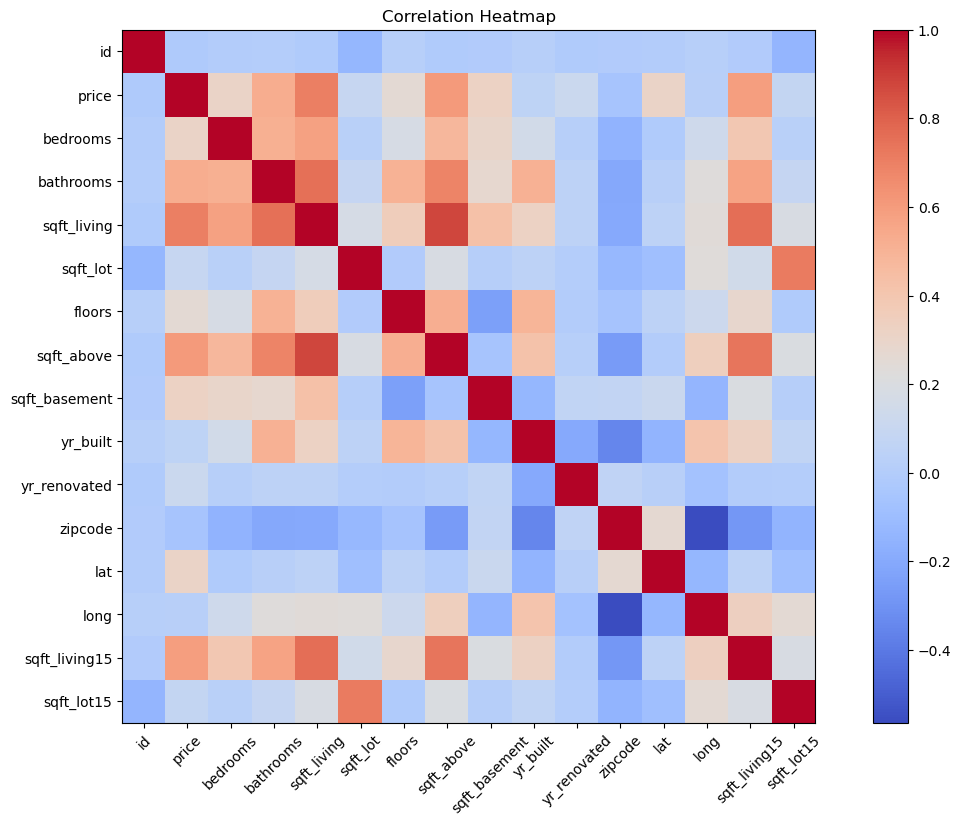

In [27]:
correlation_matrix = df.corr()
bedrooms = df["bedrooms"]
price = df["price"]
plt.figure(figsize=(15,9))
plt.imshow(correlation_matrix, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Heatmap")
plt.show()

A correlation coefficient of 0.308 indicates a weak positive relationship between the number of bedrooms and the price of a residence. This suggests that there is a positive association between the two variables, but it is not particularly strong.
A positive correlation indicates that as the number of bedrooms increases, so does the housing price. However, because the correlation coefficient is low, this association is weak. There are numerous other elements that might influence home prices, including location, size, and condition.
A correlation coefficient of 0.308 indicates a weak positive relationship between the number of bedrooms and the price of a residence. This suggests that there is a positive association between the two variables, but it is not particularly strong.
A positive correlation indicates that as the number of bedrooms increases, so does the housing price. However, because the correlation coefficient is low, this association is weak. There are numerous other elements that might influence home prices, including location, size, and condition.

### Volatility Analysis:How volatile are home prices over time? 

In [28]:
df['date'] = pd.to_datetime(df['date']) # Converting the date column to date time so that we can work with timeseries data

In [29]:
df['price_change'] = df['price'].pct_change() * 100  # Converting to percentage change

# Drop the first row (NaN due to no previous month)
df = df.dropna(subset=['price_change'])

In [30]:
# Calculating the standard deviation of price changes
std_dev = np.std(df['price_change'])

# Calculating the coefficient of variation of price changes
cv = std_dev / df['price_change'].mean()
cv

3.830090385831539

With a coefficient of variation of 3.83, price fluctuations are typically 3.83 times the mean price. This means that price fluctuations are highly erratic.
In other words, if the average property price is 100,000, the price changes will normally be around $38,300. This means that prices can vary greatly from  year to year.
If you are thinking about buying a property, you should be aware of the volatility of housing values in the area where you want to live. A high coefficient of variation implies that prices may fluctuate greatly, so consider purchasing a home with a fixed-rate mortgage to protect yourself from rising interest rates.

### Seasonal Patterns:Are there any seasonal fluctuations in home prices? 

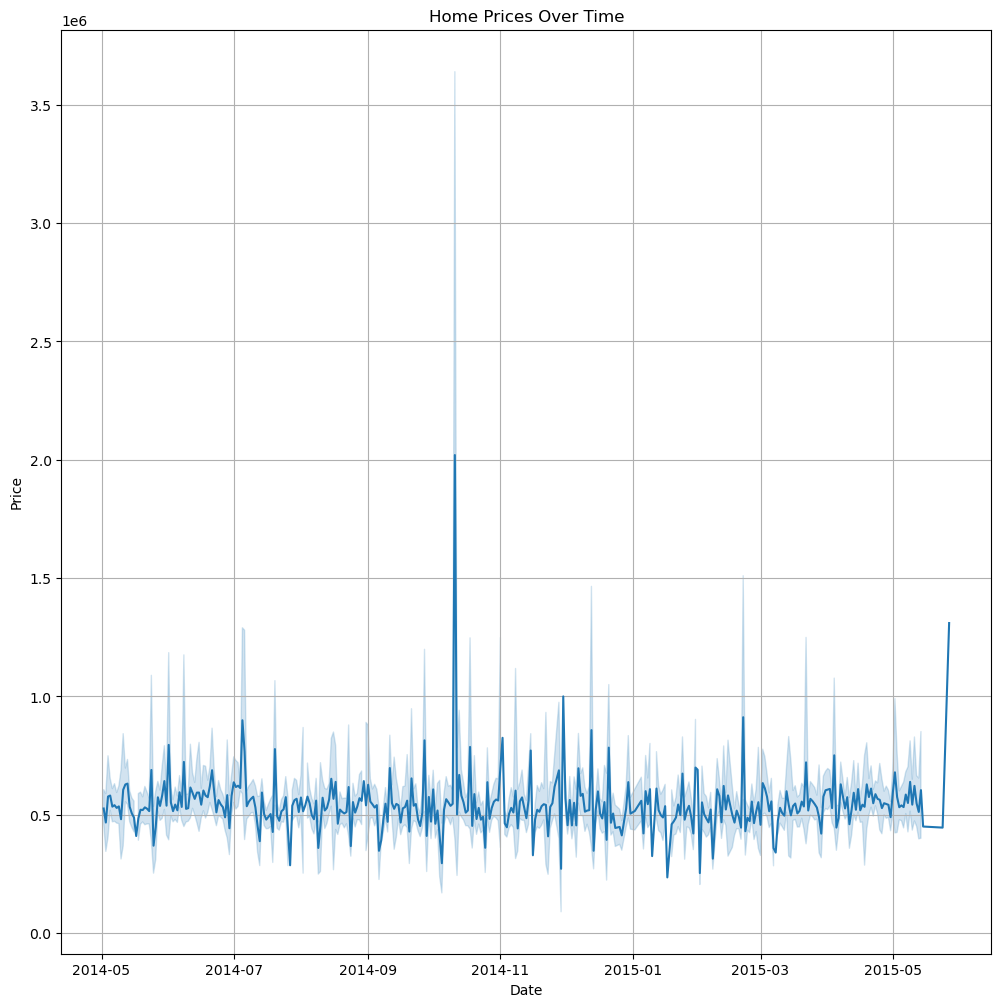

In [31]:
plt.figure(figsize=(12, 12))
sns.lineplot(data=df, x='date', y='price')
plt.title('Home Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

The graph indicates that property values have remained reasonably stable during the observed period, with no discernible seasonal variations. The interpretation should take into account the specific context of your analysis, research aims, and data granularity. Further inquiry and analysis may be required if you are looking for more thorough insights or reasons for certain fluctuations.

### Monthly prices  accross all the years

In [32]:
monthly_prices = df.groupby(df['date'].dt.to_period('M'))['price'].mean()  #I'm converting the years to months so that im able to see the 
#trends monthly
# Convert date index to datetime
monthly_prices.index = monthly_prices.index.to_timestamp()

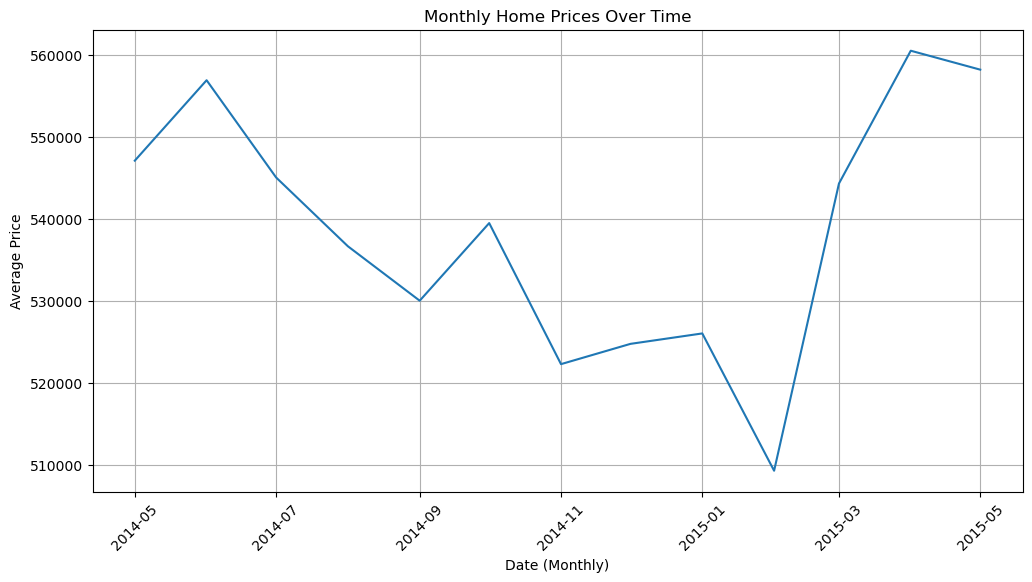

In [33]:
monthly_prices = monthly_prices.astype(float)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_prices, x=monthly_prices.index, y=monthly_prices.values)
plt.title('Monthly Home Prices Over Time')
plt.xlabel('Date (Monthly)')
plt.ylabel('Average Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

During this time period, the average home price is 538,955. On April 1, 2015, the highest property price was 560,504, and the lowest was $509,268 on February 1, 2015.
With the exception of a mild decrease in prices in November and December 2014, property prices are generally rising during this time period. This indicates that the housing market in this area is usually solid and that property prices will continue to climb in the future.

In [34]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_change
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,142.451555
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,-66.542751
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,235.555556
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,-15.562914
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,141.176471


### How house condition impacts price

In [35]:
grouped_data = df.groupby('condition')['price'].mean()
grouped_data

condition
Average      542249.323963
Fair         328178.758824
Good         520432.244122
Poor         341067.241379
Very Good    612237.913966
Name: price, dtype: float64

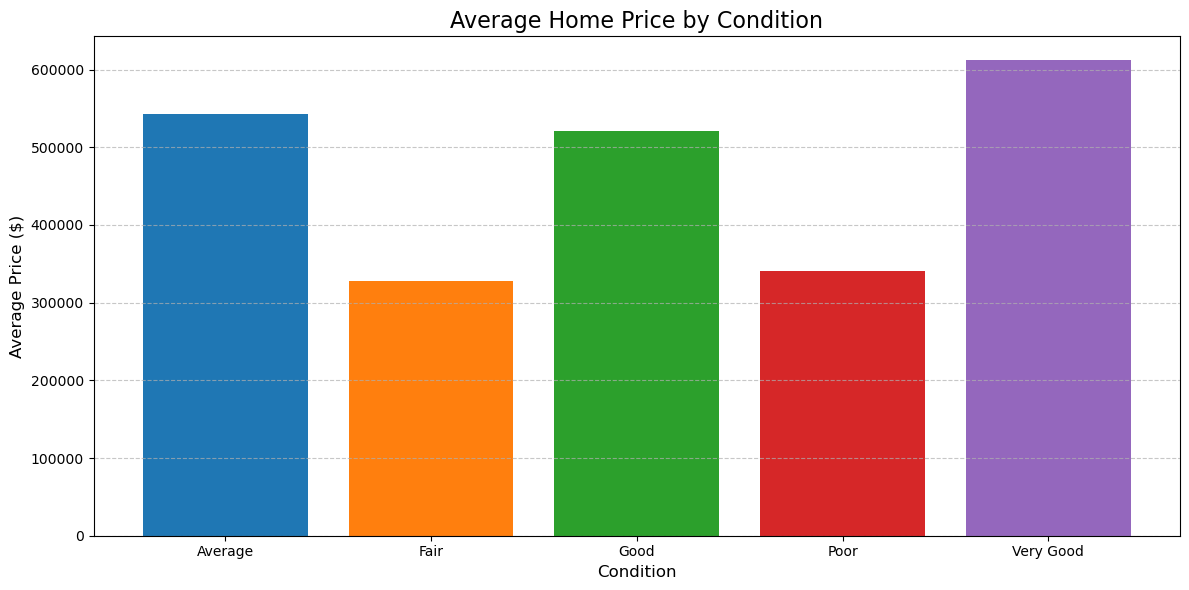

In [36]:
# Creating a bar chart of the average price for each condition
plt.figure(figsize=(12, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.bar(grouped_data.index, grouped_data.values,color=colors)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.title('Average Home Price by Condition', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  

plt.show()

According to the research, the average price of a home is significantly influenced by its condition. Homes in "Very Good" condition have the highest average price, 612,237.91, indicating that well-maintained or recently improved residences are in high demand and can cost premium pricing. Meanwhile, homes in "Average" condition are not far behind, averaging 542,249.32, demonstrating that properties in good condition are still in demand. The average price for "good" condition properties is 520,432.24. Homes in "Poor" condition, on the other hand, are at the lower end of the spectrum, averaging 341,067.24, indicating that properties in need of significant repairs or renovations tend to have lower market values. Finally, "Fair" condition homes are priced in the middle at 328,178.76.
To summarize, this data shows how important a home's condition is in determining its market value, with well-maintained houses commanding a significant premium over those in less desirable situations.

### Location Analysis:how the impact of condition varies across different neighborhoods or regions. 

In [37]:
grouped_data1 = df.groupby(['zipcode', 'condition'])['price'].mean().reset_index()
grouped_data1

,zipcode,condition,price
0,98001,Average,292352.139918
1,98001,Fair,356070.000000
2,98001,Good,253919.562500
3,98001,Very Good,242543.333333
4,98002,Average,258886.824324
...,...,...,...
277,98198,Good,316529.854369
278,98198,Very Good,321523.500000
279,98199,Average,761048.142132
280,98199,Good,796381.090909


In [38]:
very_good_data = grouped_data1[grouped_data1['condition'] == 'Very Good']
very_good_data.head()

,zipcode,condition,price
3,98001,Very Good,2.425433e+05
6,98002,Very Good,2.216411e+05
10,98003,Very Good,3.706800e+05
15,98004,Very Good,1.236365e+06
19,98005,Very Good,8.319500e+05


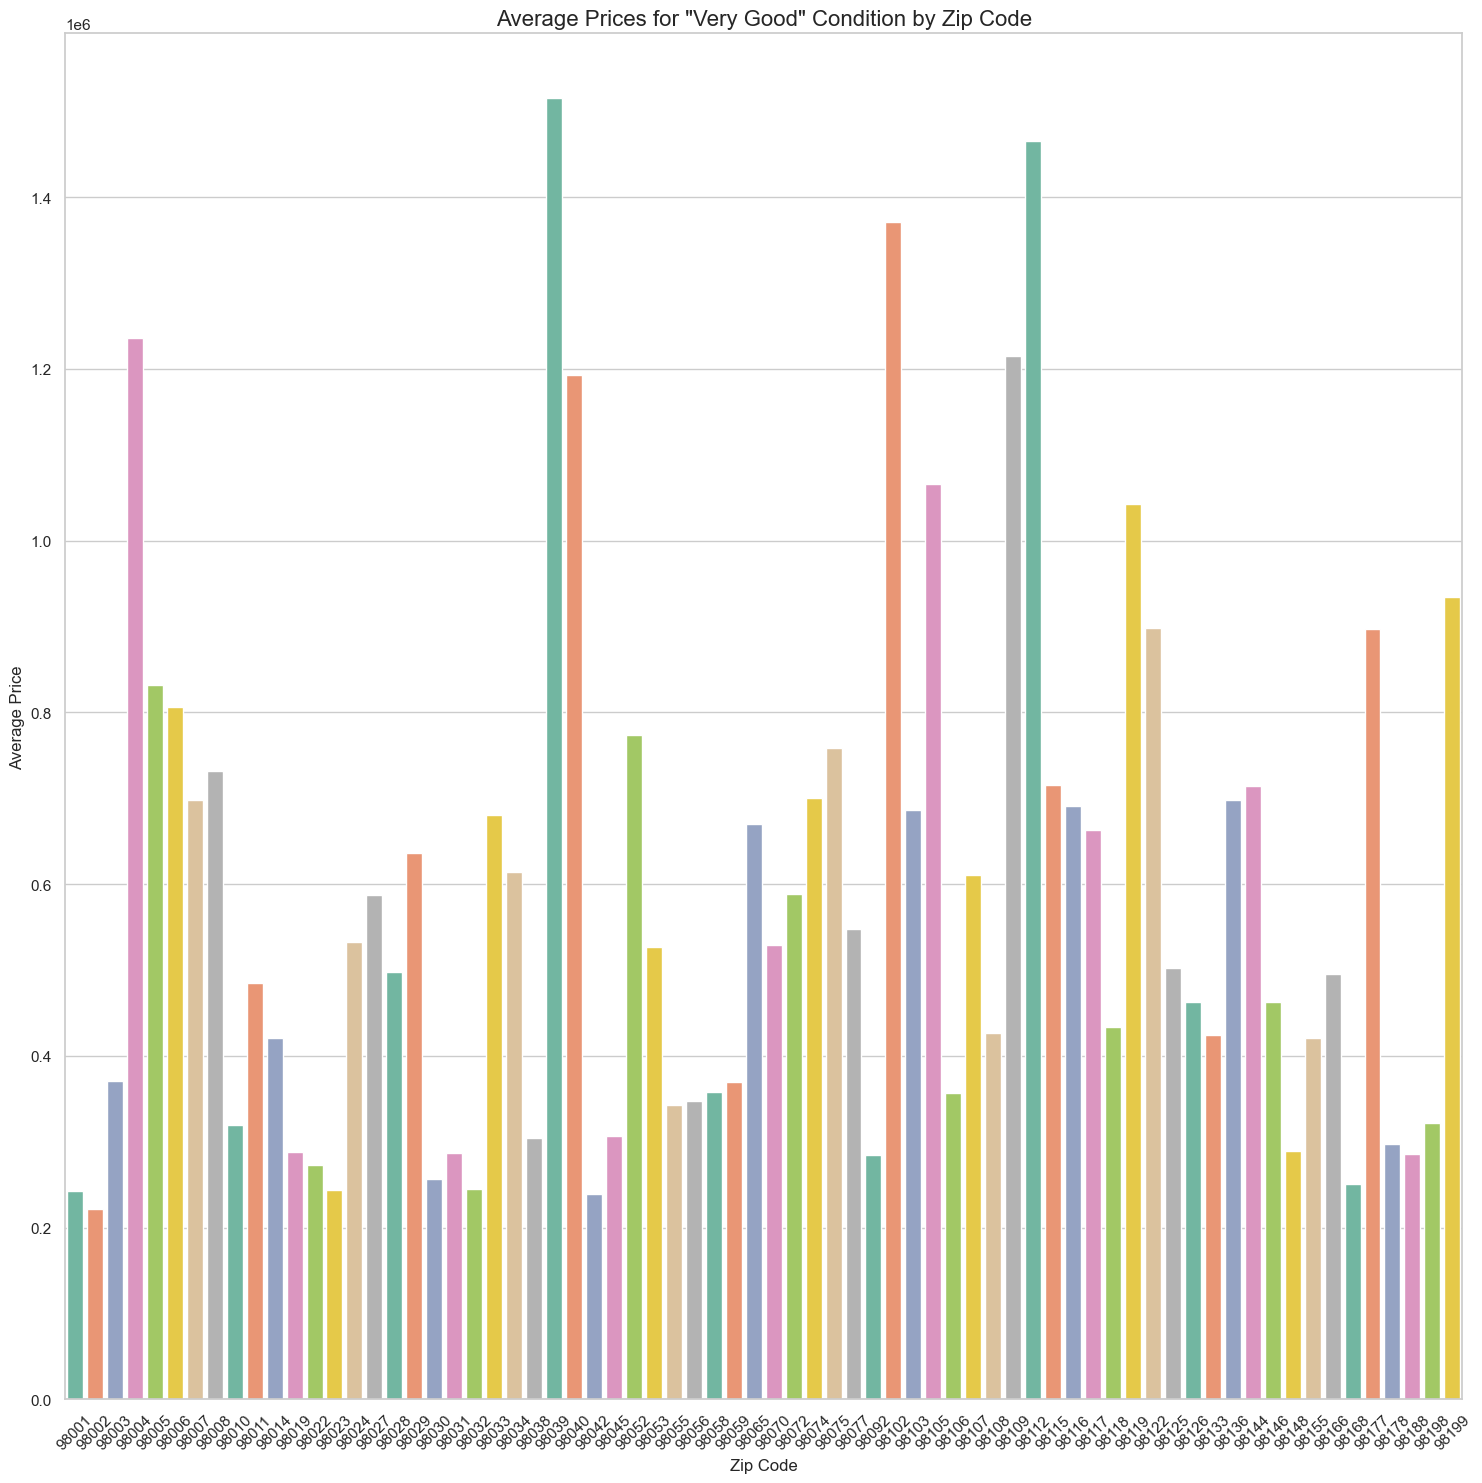

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,15))  # Adjust the figure size
sns.barplot(data=very_good_data, x='zipcode', y='price', palette='Set2')
plt.xlabel('Zip Code', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Average Prices for "Very Good" Condition by Zip Code', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

These findings show that properties in "Very Good" condition attract higher prices, with some zip codes, such as 98004 and 98005, standing out as particularly profitable places for such properties. Buyers and investors looking for well-kept houses may find these zip codes appealing, while sellers can take advantage of the desire for "Very Good" condition properties in these locations to potentially gain higher selling prices. It is crucial to remember that these pricing variances can be influenced by a variety of factors such as location, facilities, and market trends.

### Relationship between age of the property with price

In [40]:
import datetime
current_year = datetime.datetime.now().year
df['Age of Property'] = current_year - df['yr_built']  
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_change,Age of Property
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,142.451555,72
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,-66.542751,90
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,235.555556,58
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,-15.562914,36
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,141.176471,22


In [41]:
correlation_coefficient = df['Age of Property'].corr(df['price'])
correlation_coefficient

-0.05425245171120002

The -0.054 correlation indicates that, while there is a very weak negative link between property age and price, this element alone has little predictive value in determining property prices. Other characteristics, such as location, size, condition, and market dynamics, are likely to have a greater impact on property prices in your dataset.


### Creating a Renovation Score for Enhanced Home Price Estimation
We are creating a one-of-a-kind "renovation score" to serve as a helpful predictor for our home price estimating model. This renovation score incorporates the impact of property improvements on property values, allowing for a more in-depth understanding of how renovations affect home prices. Our proprietary scoring algorithm takes into account the timeliness and quality of renovations, providing data-driven insights that enable homeowners and real estate professionals to make informed decisions regarding property improvements and pricing strategies.

In [43]:
def calculate_renovation_score(row):
    
    score = 0
    
    # Define weights for renovation recency
    weight_recent = 2  # Assign a higher weight to recent renovations
    
    # Calculate the renovation score based on renovation year
    if row['yr_renovated'] > 2005:
        score += weight_recent
    
    return score

# Apply the renovation score calculation function to each row
df['renovation_score'] = df.apply(calculate_renovation_score, axis=1)
df['renovation_score'].value_counts()

0    21297
2      236
Name: renovation_score, dtype: int64

According to the scoring rationale, the bulk of the properties, totaling over 21,000, obtained a score of 0, indicating that they are widely considered as having no recent or significant modifications. A smaller subset of around 236 houses, on the other hand, obtained a non-zero score of 2, suggesting that these properties had undergone considerable or recent renovations, and these renovations are thought to positively influence their estimated home prices. This distinction enables homeowners and real estate experts to determine the perceived value of improvements within the dataset, allowing for more educated decisions about property price and renovation spending.

### Relationship between the year of house constriction with price

In [44]:
import datetime
current_year = datetime.datetime.now().year
df['Age of Property'] = current_year - df['yr_built']  
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_change,Age of Property,renovation_score
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,142.451555,72,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,-66.542751,90,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,235.555556,58,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,-15.562914,36,0
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,141.176471,22,0


In [45]:
correlation_coefficient = df['Age of Property'].corr(df['price'])
correlation_coefficient

-0.05425245171120002

The -0.054 correlation indicates that, while there is a very weak negative link between property age and price, this element alone has little predictive value in determining property prices. Other characteristics, such as location, size, condition, and market dynamics, are likely to have a greater impact on property prices in your dataset.


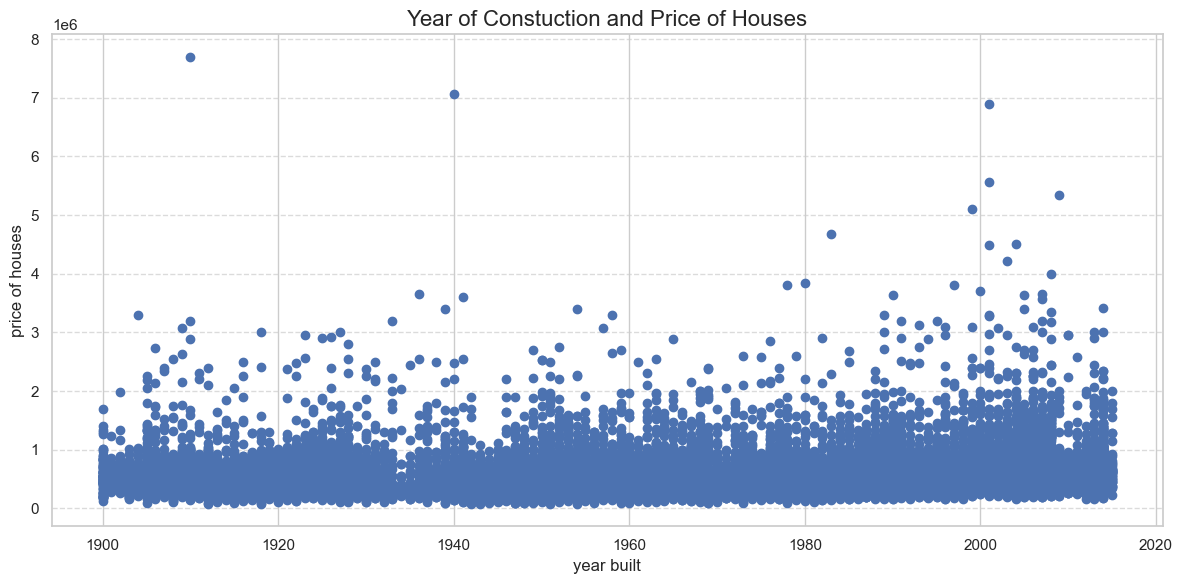

In [47]:
plt.figure(figsize=(12, 6))
plt.scatter (df['yr_built'], df['price'])
plt.xlabel('year built', fontsize=12)
plt.ylabel('price of houses', fontsize=12)
plt.title('Year of Constuction and Price of Houses', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  

In [48]:
cor=np.corrcoef(df['price'], df['yr_built']) # finding the correlation between the pice of houses and the the year it was built 
cor

array([[1.        , 0.05425245],
       [0.05425245, 1.        ]])

Correlation Coeffience of 0.05, between year of contruction and the price is weak. Date of constuction has little impact on the price of the house

### Impact of basement on house prices

In [51]:
cor=np.corrcoef(df['price'], df['sqft_basement']) # finding the correlation between the pice of houses and the the year it was built 
cor

array([[1.        , 0.31906455],
       [0.31906455, 1.        ]])

Correlation Coeffience of 0.32, between the size of basement and price is significant.It is posibble to assume that houses with basement most like have a parking space which may increase the demand. This may lead to high prices.

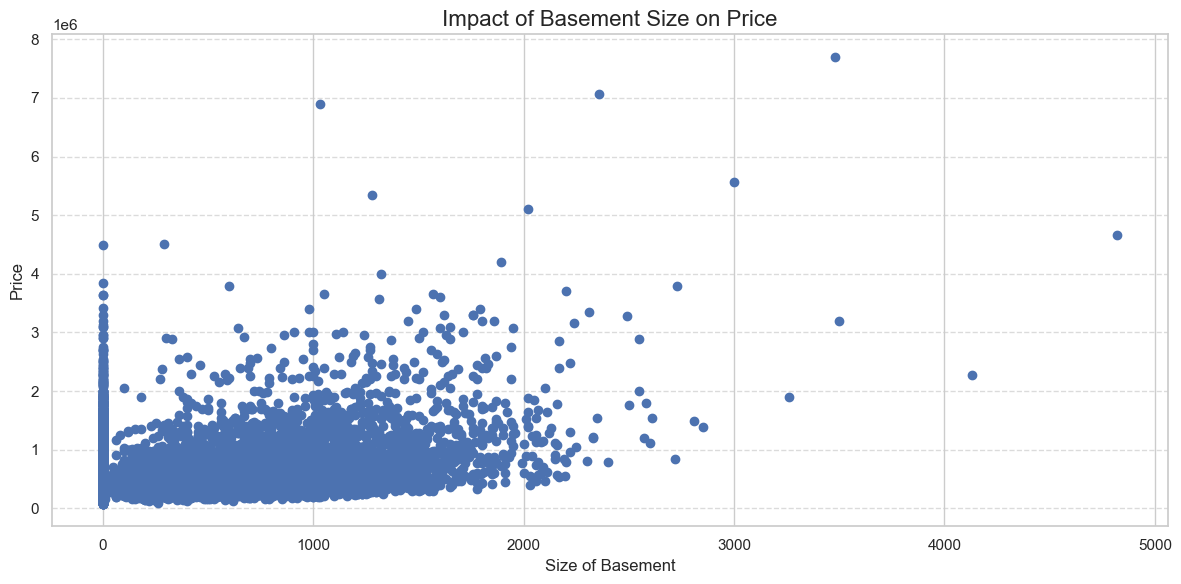

In [54]:
plt.figure(figsize=(12, 6))
plt.scatter (df['sqft_basement'], df['price'])
plt.xlabel('Size of Basement', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Impact of Basement Size on Price', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  

### Determining the cost of a square feet of a Basement 

From the data in the Column  "sqft_basement", there are values the are assigned to zero. When "Price " is divided by zero,it results to an error. In this cas we hhave to replace zero values with one to avoid error and not affecting the number itself.In order to avoid altering data, we have reassigned df to df1.

In [55]:
df1=df
df1.head ()# displying the 5 rows shows that 0.00 values in sqft_basement

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_change,Age of Property,renovation_score
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,142.451555,72,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,-66.542751,90,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,235.555556,58,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,-15.562914,36,0
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,141.176471,22,0


In [57]:
df1['sqft_basement'] = df1['sqft_basement'].replace(0, 1) # code for replacing zero with 1.
df1.head() # bzero have been replced 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_change,Age of Property,renovation_score
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,142.451555,72,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,1.0,1933,0.0,98028,47.7379,-122.233,2720,8062,-66.542751,90,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,235.555556,58,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,1.0,1987,0.0,98074,47.6168,-122.045,1800,7503,-15.562914,36,0
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,141.176471,22,0


In [59]:
df1['Price_Basement_sqft']= df1['price']/ df1['sqft_basement'] # Calculating the cost of basement per square feet and addig the column to the dataset 
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_change,Age of Property,renovation_score,Price_Basement_sqft
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,142.451555,72,0,1345.000000
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,1.0,1933,0.0,98028,47.7379,-122.233,2720,8062,-66.542751,90,0,180000.000000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,235.555556,58,0,663.736264
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,1.0,1987,0.0,98074,47.6168,-122.045,1800,7503,-15.562914,36,0,510000.000000
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,141.176471,22,0,803.921569


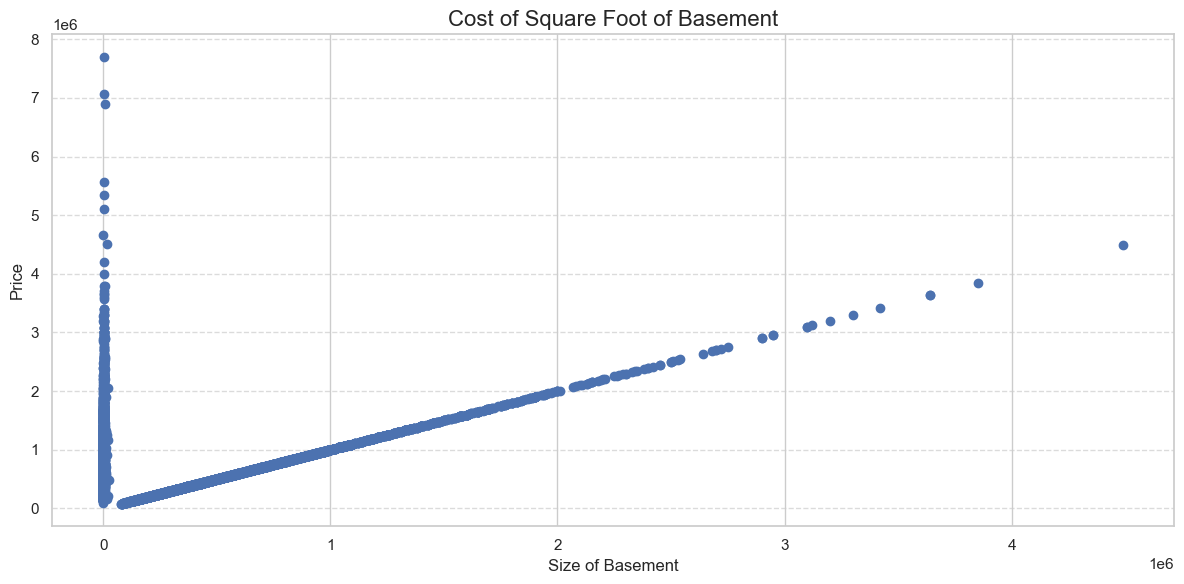

In [60]:
plt.figure(figsize=(12, 6))
plt.scatter (df1['Price_Basement_sqft'], df1['price'])
plt.xlabel('Size of Basement', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Cost of Square Foot of Basement', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()


In [61]:
correaltion =np.corrcoef(df['price'], df['Price_Basement_sqft']) # finding the correlation between the pice of houses and the the year it was built 
correaltion

array([[1.        , 0.32452738],
       [0.32452738, 1.        ]])

Correlation Coeffient is 0.3. Though weak, seem to have a significant impact. There is an impact of the size of basement on the price of a house. 